In [7]:
from params import params
from fine_tuning import fine_tuning_beit as fn
from image_collector import image_collector as ic
import torch
from torch.optim import Adam
from torch.nn import CrossEntropyLoss 
from transformers import BeitConfig, BeitImageProcessor, BeitForImageClassification
# from srcs.image_collector.image_collector import load_image_collection, RGB_convert
from make_graph import make_graph
from matplotlib import pyplot as plt

In [8]:
#------------------------ Loading collection -----------------------------#
cat_collection = ic.RGB_convert(ic.load_image_collection(params.cat_path, 10, ".jpg"))
dog_collection = ic.RGB_convert(ic.load_image_collection(params.dog_path, 10, ".jpg"))
dog_val_collection = ic.RGB_convert(ic.load_image_collection(params.dog_val_path, 10, ".jpg"))
cat_val_collection = ic.RGB_convert(ic.load_image_collection(params.cat_val_path, 10, ".jpg"))
val_collection = cat_val_collection + dog_val_collection
all_images = cat_collection + dog_collection

/home/lu/Coding/models/BEiT_cats_and_dogs/dataset/train/cats/cat_1.jpg
/home/lu/Coding/models/BEiT_cats_and_dogs/dataset/train/cats/cat_2.jpg
/home/lu/Coding/models/BEiT_cats_and_dogs/dataset/train/cats/cat_3.jpg
/home/lu/Coding/models/BEiT_cats_and_dogs/dataset/train/cats/cat_4.jpg
/home/lu/Coding/models/BEiT_cats_and_dogs/dataset/train/cats/cat_5.jpg
/home/lu/Coding/models/BEiT_cats_and_dogs/dataset/train/cats/cat_6.jpg
/home/lu/Coding/models/BEiT_cats_and_dogs/dataset/train/cats/cat_7.jpg
/home/lu/Coding/models/BEiT_cats_and_dogs/dataset/train/cats/cat_8.jpg
/home/lu/Coding/models/BEiT_cats_and_dogs/dataset/train/cats/cat_9.jpg
/home/lu/Coding/models/BEiT_cats_and_dogs/dataset/train/cats/cat_10.jpg
/home/lu/Coding/models/BEiT_cats_and_dogs/dataset/train/dogs/dog_1.jpg
/home/lu/Coding/models/BEiT_cats_and_dogs/dataset/train/dogs/dog_2.jpg
/home/lu/Coding/models/BEiT_cats_and_dogs/dataset/train/dogs/dog_3.jpg
/home/lu/Coding/models/BEiT_cats_and_dogs/dataset/train/dogs/dog_4.jpg
/home

In [9]:
#-------------- Importing, initilazing and setting model and processor ---#
# Load processor
processor = BeitImageProcessor.from_pretrained('microsoft/beit-base-patch16-224')
# Load the pre-trained model configuration
config = BeitConfig.from_pretrained('microsoft/beit-base-patch16-224')
# Set number of classes to 2 (cats and dogs)
config.num_labels = 2
# Initialize the model with the updated config
model = BeitForImageClassification(config)
# Set model in training mode
model.train()

/home/lu/.local/lib/python3.10/site-packages/transformers/utils/deprecation.py:165: UserWarning: The following named arguments are not valid for `BeitImageProcessor.__init__` and were ignored: 'feature_extractor_type'
  return func(*args, **kwargs)


BeitForImageClassification(
  (beit): BeitModel(
    (embeddings): BeitEmbeddings(
      (patch_embeddings): BeitPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): BeitEncoder(
      (layer): ModuleList(
        (0): BeitLayer(
          (attention): BeitAttention(
            (attention): BeitSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=False)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
              (relative_position_bias): BeitRelativePositionBias()
            )
            (output): BeitSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (int

In [10]:
#-------------- Loading model on device (cpu) ----------------------------#
device = torch.device("cpu")
model.to(device)

BeitForImageClassification(
  (beit): BeitModel(
    (embeddings): BeitEmbeddings(
      (patch_embeddings): BeitPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): BeitEncoder(
      (layer): ModuleList(
        (0): BeitLayer(
          (attention): BeitAttention(
            (attention): BeitSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=False)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
              (relative_position_bias): BeitRelativePositionBias()
            )
            (output): BeitSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (int

In [11]:
#-------------- Defining collection and labels ---------------------------#
collection =  cat_collection + dog_collection
labels = ([0] * len(cat_collection)) + ([1] * len(dog_collection))

In [12]:
#-------------- Converting images and labels into tensors ----------------#
batch = processor(images=collection, return_tensors="pt")
labels = torch.tensor(labels)

In [13]:
#-------------- loading tensors on device (cpu) --------------------------#
inputs = {k: v.to(device) for k, v in batch.items()}
labels = labels.to(device)

In [ ]:
lst_res = fn.epoch_tester(range_epoch=[3, 10], turns=1, collection=collection, val_collection=val_collection, model=model, processor=processor, batch=batch, labels=labels, lr=0.0001)

Testing collection of 20 images, 1 epochs(s), turn 1/1 : 
Epoch 1/1, Loss: 0.6295
Predicted classes for evaluation images: [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0], 13/20
65
average: 65.0
[65.0]
Testing collection of 20 images, 2 epochs(s), turn 1/1 : 
Epoch 1/2, Loss: 0.7625
Epoch 2/2, Loss: 6.2193
Predicted classes for evaluation images: [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0], 11/20
55
average: 55.0
[65.0, 55.0]


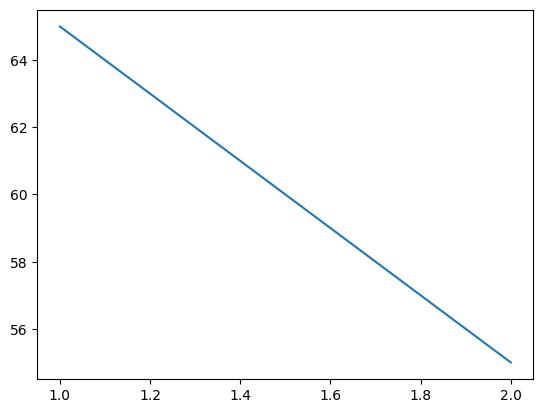

In [15]:

plt.plot([1, 2], lst_res)
plt.show()